In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import json
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('Librerías cargadas correctamente')
print(f'   pandas: {pd.__version__}')
print(f'   numpy: {np.__version__}')

Librerías cargadas correctamente
   pandas: 2.3.3
   numpy: 1.26.4


In [7]:
# AWS Config
s3 = boto3.client('s3')
sts = boto3.client('sts')

account_id = sts.get_caller_identity()['Account']
bucket_name = f'ml-reestructuraciones-{account_id}'

print(f'Bucket: {bucket_name}')
print(f'Account: {account_id}')

# Verificar archivos en S3
print('\nArchivos en data/raw/:')
try:
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix='data/raw/')
    
    if 'Contents' in response:
        for obj in response['Contents']:
            size_mb = obj['Size'] / (1024 * 1024)
            print(f"   {obj['Key']} ({size_mb:.2f} MB)")
    else:
        print('   No hay archivos todavía')
except Exception as e:
    print(f'   Error: {e}')

Bucket: ml-reestructuraciones-029885540752
Account: 029885540752

Archivos en data/raw/:
   data/raw/ (0.00 MB)
   data/raw/maestria.csv (187.26 MB)


In [8]:
# Cargar dataset desde S3
print('Cargando datos desde S3...')

# AJUSTA EL NOMBRE DE TU ARCHIVO CSV AQUÍ
csv_file = 'maestria.csv'  # <-- CAMBIA ESTO SI ES NECESARIO

try:
    df = pd.read_csv(f's3://{bucket_name}/data/raw/{csv_file}')
    
    print(f'\nDatos cargados exitosamente')
    print(f'   Shape: {df.shape}')
    print(f'   Filas: {df.shape[0]:,}')
    print(f'   Columnas: {df.shape[1]}')
    print(f'   Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
    
except FileNotFoundError:
    print(f'\nArchivo no encontrado: {csv_file}')
    print(f'\nOpciones:')
    print(f'   1. Sube tu CSV a S3:')
    print(f'      aws s3 cp tu_archivo.csv s3://{bucket_name}/data/raw/')
    print(f'   2. O usa el botón Upload en JupyterLab y ejecuta:')
    print(f'      !aws s3 cp tu_archivo.csv s3://{bucket_name}/data/raw/')
except Exception as e:
    print(f'\nError: {e}')

Cargando datos desde S3...

Datos cargados exitosamente
   Shape: (711277, 45)
   Filas: 711,277
   Columnas: 45
   Memoria: 555.81 MB


In [9]:
# Primeras filas
print('Primeras 10 filas del dataset:\n')
df.head(10)

Primeras 10 filas del dataset:



,mora_max_6m,fecha_reest,vr_total_reest,avg_alt_mora_6m,max_alt_mora_6m,avg_std_mora_6m,avg_meses_con_mora,meses_mora_180plus,meses_mora_90plus,meses_mora_30plus,...,ipc,tasa_desempleo,pib,num_reest_anteriores,num_reest_ext,num_oblg_mora_ext,num_oblg_activa_ext,num_oblg_embarg_ext,vr_mora_total_ext,cupo_total
0,157,2024-01-26,5955896.34,89.330000,164.0,56.350000,6.0,0,3,5,...,0.083496,0.123785,0.004796,0,9.0,9.0,12.0,0.0,112410.0,364446.0
1,0,2024-01-09,761578.00,27.000000,66.0,30.400000,3.0,0,0,2,...,0.083496,0.123785,0.004796,4,9.0,9.0,15.0,3.0,1911.0,58527.0
2,148,2023-08-31,6885708.00,160.170000,236.0,57.370000,6.0,2,5,6,...,0.114321,0.095821,-0.003074,0,NaN,NaN,NaN,NaN,NaN,NaN
3,84,2022-11-02,68775977.67,20.000000,58.0,12.395000,4.0,0,0,1,...,0.125316,0.091083,0.040155,0,NaN,NaN,NaN,NaN,NaN,NaN
4,13,2022-05-17,217249.52,78.085000,209.0,24.945000,4.5,1,5,6,...,0.090592,0.110239,0.109020,0,NaN,NaN,NaN,NaN,NaN,NaN
5,161,2022-01-20,7211007.95,7.556667,46.0,12.536667,2.0,0,0,1,...,0.069399,0.148306,0.101628,1,NaN,NaN,NaN,NaN,NaN,NaN
6,99,2024-06-11,13091924.00,84.170000,163.0,57.900000,6.0,0,3,5,...,0.071760,0.101975,0.016807,0,0.0,1.0,4.0,0.0,1010.0,31624.0
7,156,2022-06-30,47253.00,34.330000,90.0,34.850000,4.0,0,0,2,...,0.096801,0.117282,0.122383,0,12.0,9.0,21.0,0.0,1647.0,25419.0
8,13,2024-02-19,472066.00,41.750000,87.0,37.620000,3.0,0,0,2,...,0.077377,0.116219,0.003492,3,NaN,NaN,NaN,NaN,NaN,NaN
9,0,2024-03-18,12365066.75,6.500000,34.0,13.620000,2.0,0,0,1,...,0.073689,0.107566,0.002187,0,0.0,0.0,96.0,0.0,0.0,172017.0


In [10]:
# Información del dataset
print('INFORMACIÓN DEL DATASET')
print('='*70)
df.info()

print('\nTIPOS DE DATOS:')
print(df.dtypes.value_counts())

print('\nCOLUMNAS NUMÉRICAS:', df.select_dtypes(include=[np.number]).shape[1])
print('COLUMNAS CATEGÓRICAS:', df.select_dtypes(include=['object']).shape[1])

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711277 entries, 0 to 711276
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   mora_max_6m              711277 non-null  int64  
 1   fecha_reest              711277 non-null  object 
 2   vr_total_reest           711277 non-null  float64
 3   avg_alt_mora_6m          711277 non-null  float64
 4   max_alt_mora_6m          711277 non-null  float64
 5   avg_std_mora_6m          696443 non-null  float64
 6   avg_meses_con_mora       711277 non-null  float64
 7   meses_mora_180plus       711277 non-null  int64  
 8   meses_mora_90plus        711277 non-null  int64  
 9   meses_mora_30plus        711277 non-null  int64  
 10  max_sld_int_6m           711277 non-null  float64
 11  avg_saldo_capital_6m     711277 non-null  float64
 12  max_saldo_capital_6m     711277 non-null  float64
 13  max_saldo_vencido_30_6m  711277 non

In [11]:
# Estadísticas de variables numéricas
print('ESTADÍSTICAS DESCRIPTIVAS')
print('='*70)
df.describe()

ESTADÍSTICAS DESCRIPTIVAS


,mora_max_6m,vr_total_reest,avg_alt_mora_6m,max_alt_mora_6m,avg_std_mora_6m,avg_meses_con_mora,meses_mora_180plus,meses_mora_90plus,meses_mora_30plus,max_sld_int_6m,...,ipc,tasa_desempleo,pib,num_reest_anteriores,num_reest_ext,num_oblg_mora_ext,num_oblg_activa_ext,num_oblg_embarg_ext,vr_mora_total_ext,cupo_total
count,711277.000000,7.112770e+05,711277.000000,711277.000000,696443.000000,711277.000000,711277.000000,711277.000000,711277.000000,7.112770e+05,...,711277.000000,711277.000000,711277.000000,711277.000000,307907.000000,307907.000000,307907.000000,307907.000000,3.072500e+05,3.076160e+05
mean,76.907265,1.238157e+07,35.112310,78.388716,27.460787,3.467368,0.088600,0.812070,2.275516,6.876672e+05,...,0.088142,0.103436,0.021961,0.689236,3.345673,7.934292,64.034644,0.232713,1.037693e+04,2.226457e+05
std,73.885996,8.683035e+07,46.646829,65.361804,17.146954,1.955846,0.515698,1.431324,2.058337,4.043335e+06,...,0.026938,0.012820,0.028382,1.806738,9.611704,43.341843,231.061923,2.610028,4.660842e+04,7.624692e+05
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.050891,0.080252,-0.006666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8.000000,4.377670e+05,9.250000,33.000000,13.890000,2.000000,0.000000,0.000000,1.000000,6.233060e+04,...,0.068576,0.094733,0.004111,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000e+00,2.874200e+04
50%,64.000000,1.796291e+06,22.535789,64.000000,25.270000,3.000000,0.000000,0.000000,2.000000,2.175820e+05,...,0.083496,0.102094,0.017253,0.000000,0.000000,3.000000,31.000000,0.000000,1.488000e+03,7.374500e+04
75%,152.000000,9.967416e+06,48.170000,115.000000,41.200000,5.000000,0.000000,1.000000,4.000000,5.895978e+05,...,0.114321,0.110911,0.025718,0.000000,4.000000,8.000000,58.000000,0.000000,6.418750e+03,1.877890e+05
max,26224.000000,3.895357e+10,2325.830000,2402.000000,498.460000,12.000000,12.000000,12.000000,12.000000,1.360075e+09,...,0.133408,0.148306,0.122383,100.000000,407.000000,2016.000000,11180.000000,168.000000,3.852909e+06,3.690176e+07


In [12]:
target_col = 'cumple_6m'  # <-- CAMBIA ESTO AL NOMBRE CORRECTO

# Verificar si existe
if target_col in df.columns:
    print(f'\nVariable objetivo: {target_col}')
    print(f'\nDistribución:')
    print(df[target_col].value_counts())
    print(f'\nPorcentajes:')
    print(df[target_col].value_counts(normalize=True).round(4) * 100)
else:
    print(f'\nColumna "{target_col}" no encontrada')


Variable objetivo: cumple_6m

Distribución:
cumple_6m
1    442306
0    268971
Name: count, dtype: int64

Porcentajes:
cumple_6m
1    62.18
0    37.82
Name: proportion, dtype: float64


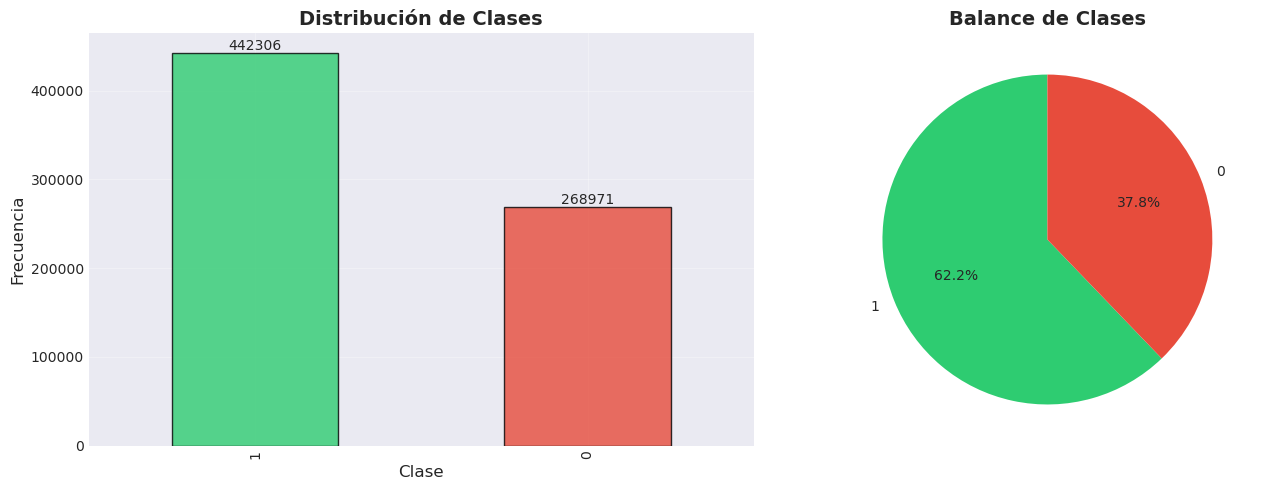


Ratio de desbalance: 1.64:1


In [14]:
if target_col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico 1: Conteo
    df[target_col].value_counts().plot(
        kind='bar', 
        ax=axes[0], 
        color=['#2ecc71', '#e74c3c'],
        edgecolor='black',
        alpha=0.8
    )
    axes[0].set_title('Distribución de Clases', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Clase', fontsize=12)
    axes[0].set_ylabel('Frecuencia', fontsize=12)
    axes[0].grid(alpha=0.3)
    
    # Agregar valores en las barras
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d')
    
    # Gráfico 2: Porcentaje
    df[target_col].value_counts().plot(
        kind='pie', 
        ax=axes[1], 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#2ecc71', '#e74c3c']
    )
    axes[1].set_title('Balance de Clases', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    # Calcular ratio
    counts = df[target_col].value_counts()
    class_ratio = counts.values[0] / counts.values[1]
    print(f'\nRatio de desbalance: {class_ratio:.2f}:1')

ANÁLISIS DE VALORES FALTANTES

18 columnas con valores faltantes:

            Columna  Faltantes  Porcentaje
       nivel_riesgo     657311   92.412801
  vr_mora_total_ext     404027   56.803046
         cupo_total     403661   56.751589
  num_oblg_mora_ext     403370   56.710677
num_oblg_embarg_ext     403370   56.710677
num_oblg_activa_ext     403370   56.710677
      num_reest_ext     403370   56.710677
    nivel_academico     401159   56.399827
       estado_civil      47089    6.620346
               ciiu      42170    5.928773
          ocupacion      34357    4.830326
             genero      20005    2.812547
            ano_nac      18507    2.601940
    avg_std_mora_6m      14834    2.085545
           cod_ciiu       7357    1.034337
       sub_segmento       5014    0.704929
   ingresos_totales        204    0.028681
         patrimonio        131    0.018418


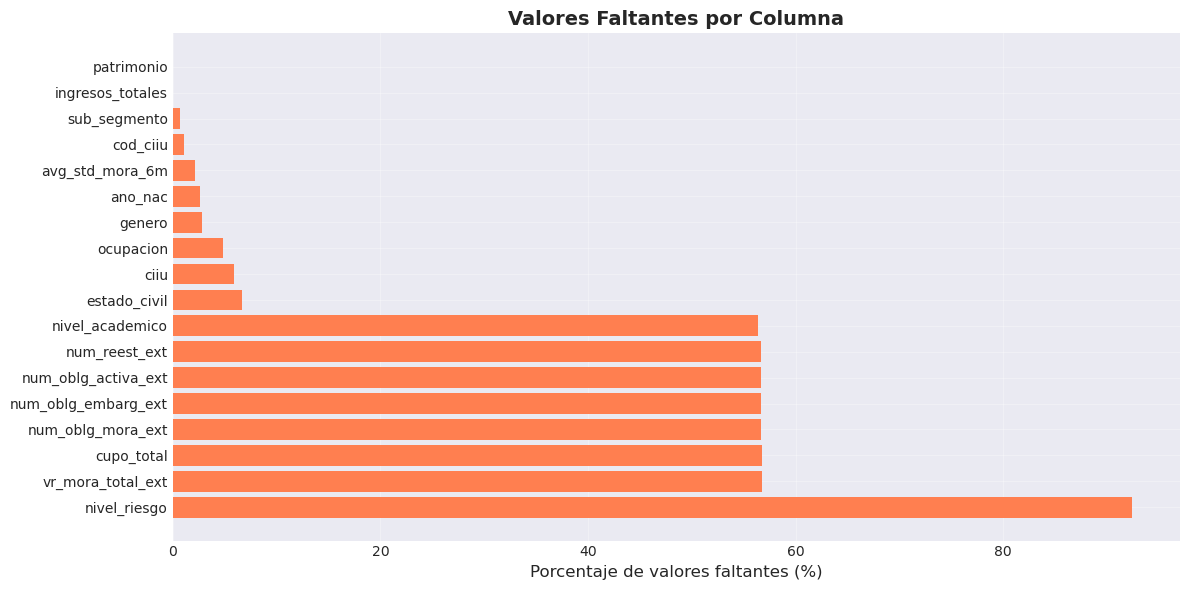

In [15]:
print('ANÁLISIS DE VALORES FALTANTES')
print('='*70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Faltantes': missing.values,
    'Porcentaje': missing_pct.values
}).sort_values('Faltantes', ascending=False)

missing_df = missing_df[missing_df['Faltantes'] > 0]

if len(missing_df) > 0:
    print(f'\n{len(missing_df)} columnas con valores faltantes:\n')
    print(missing_df.to_string(index=False))
    
    # Visualización
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Columna'], missing_df['Porcentaje'], color='coral')
    plt.xlabel('Porcentaje de valores faltantes (%)', fontsize=12)
    plt.title('Valores Faltantes por Columna', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print('\nNo hay valores faltantes en el dataset')

In [ ]:
# Solo variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f'📊 Variables numéricas: {len(numeric_cols)}')

if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(
        corr_matrix, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm',
        center=0, 
        square=True, 
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print('⚠️ No hay suficientes variables numéricas para correlación')